In [40]:
import cv2
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from database  import ImageDataset
import torch
import random
import pandas as pd 
import torchvision.transforms as transforms
from utils import *



In [36]:
class TestOpts():
    def __init__(self,seed=1234):
        self.fix_seed(seed)
        self.experience_ver="cyclegan_unpaired_ver3.1.0"
        # self.experience_ver="cyclegan_unpaired_ver1.0.0"
        # self.experience_ver="cyclegan_paired_ver1.0.0"
        self.version="0.0.0"
        self.start_epoch = 0
        self.n_epochs = 1
        self.batch_size = 1
        self.dataroot = r"E:\KISUKE\SUNRGBD\SUNRGBD\kv1\b3dodata/"
        self.lr = 0.0002
        self.decay_epoch = 200
        self.size = 256
        self.depth_name="depth"
        self.domainA_nc = 3
        self.domainB_nc = 1
        self.cpu = False
        self.n_cpu = 0
        self.device_name = "cuda:0" #if torch.cuda.is_available() else "cpu"
        self.device =  torch.device(self.device_name) 
        self.load_weight = True

    def fix_seed(self,seed):
        # Numpy
        np.random.seed(seed)
        random.seed(seed)
        # Pytorch
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
opt=TestOpts()

In [37]:
transforms_ = [ transforms.Lambda(normalize),]
dataset=ImageDataset(root=opt.dataroot, transforms_=transforms_,depth_name=opt.depth_name,depth_gray=True, unaligned=False,limit=None)
#Dataset for sampling 
sample_images=[dataset[i] for i in range(100) ]

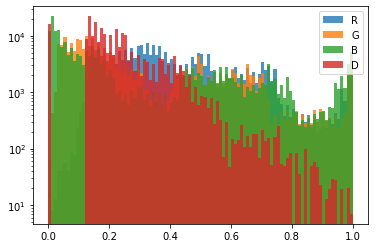

In [47]:
plt.hist(np.reshape(np.array(sample_images[14]["A"])[:,:,0],-1), alpha=0.8, histtype='stepfilled',label="R",bins=100)
plt.hist(np.reshape(np.array(sample_images[14]["A"])[:,:,1],-1), alpha=0.8, histtype='stepfilled',label="G",bins=100)
plt.hist(np.reshape(np.array(sample_images[14]["A"])[:,:,2],-1), alpha=0.8, histtype='stepfilled',label="B",bins=100)
plt.hist(np.reshape(np.array(sample_images[14]["B"]),-1), alpha=0.8, histtype='stepfilled',label="D",bins=100)
plt.legend()
plt.yscale("log")

In [49]:
df=pd.DataFrame()

R=[np.reshape(np.array(s["A"])[:,:,0],-1) for s in sample_images]
G=[np.reshape(np.array(s["A"])[:,:,1],-1) for s in sample_images]
B=[np.reshape(np.array(s["A"])[:,:,2],-1) for s in sample_images]
D=[np.reshape(np.array(s["B"]),-1) for s in sample_images]

df["R"]= np.mean(R,axis=0)
df["G"]=np.mean(G,axis=0)
df["B"]=np.mean(B,axis=0)
df["D"]=np.mean(D,axis=0)
print(np.shape(df.R))
    

(239547,)


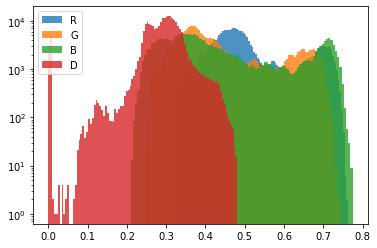

In [50]:
plt.hist(df.R, alpha=0.8, histtype='stepfilled',label="R",bins=100)
plt.hist(df.G, alpha=0.8, histtype='stepfilled',label="G",bins=100)
plt.hist(df.B, alpha=0.8, histtype='stepfilled',label="B",bins=100)
plt.hist(df.D, alpha=0.8, histtype='stepfilled',label="D",bins=100)
plt.legend()
plt.yscale("log")